# Supervised Learning Project

## Domain:

**_Banking_**

## Context:

    This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

## Attribute Information:
* ID : Customer ID
* Age : Customer's age in completed years
* Experience : #years of professional experience
* Income : Annual income of the customer (In Dollars)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month (In Dollars)
* Education : Education Level.
    1. Undergraduate
    2. Graduate
    3. Advanced/Professional
* Mortgage : Value of house mortgage if any. (In Dollars)
* Personal Loan : Did this customer accept the personal loan offered in the last campaign?
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* Credit card : Does the customer use a credit card issued by Thera Bank?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

##                    Exploratory Data Analysis [ EDA]

**Load and Read Data as a Frame**

* Will Read data using the pd.read and display using head

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Comments :**

* From the above we could see that each Id has all the entries for the attributes
* From the data we could see Target Column name is **Personal Loan**
* For the easy usage will rearrage the Personal column to the front

In [3]:
taregt_column = df['Personal Loan']
df.drop(['Personal Loan'], axis=1, inplace = True)
df['Personal Loan'] = taregt_column
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


* Target column **Personal Column** has been rearranged to last

**Undersatanding about attributes from Dataframe:**

**Nonimal Varibles :**
[Categories (Unique Variable with no order)]

* ID
* ZIP Code

**Ordinal Categorical variables :**
[Ordered Categories (Education Levelling and number of People in Family)]

* Family
* Education

**Interval Variables :**
[Measuremnts with less Zero input]

* Age
* Experience
* Income
* CCAvg
* Mortgage

**Binary Categorical Variable :**

* CD Account
* Security Account
* Online
* Credit Card
* Personal Loan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [7]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [8]:
df.isnull().values.any()

False

In [9]:
df.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
Personal Loan             0.096000
dtype: float64

In [10]:
df.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
Personal Loan             0.0
dtype: float64

In [11]:
df.mode()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,35.0,32.0,44.0,94720.0,1.0,0.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Value Visualization

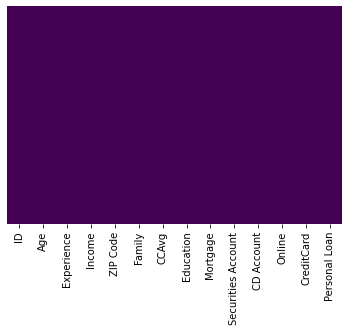

In [12]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

### Check Unique Data

In [13]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

#### Transposing Index and Cloumns

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


##### Observation:

* From the Data description we could see Experience in Negative which is inaccurate. We will curate the data and fix it.
* Binary varibales **'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account'** has clean data
* Target Variable **Personal Loan** is clean and looks fine
* Ordinary Categorical Variable **Family** and **Education** data is also clean

###### Five Point Summary:

* Min
* Max
* 25%
* 50%
* 75%

In [15]:
df_transpose = df.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


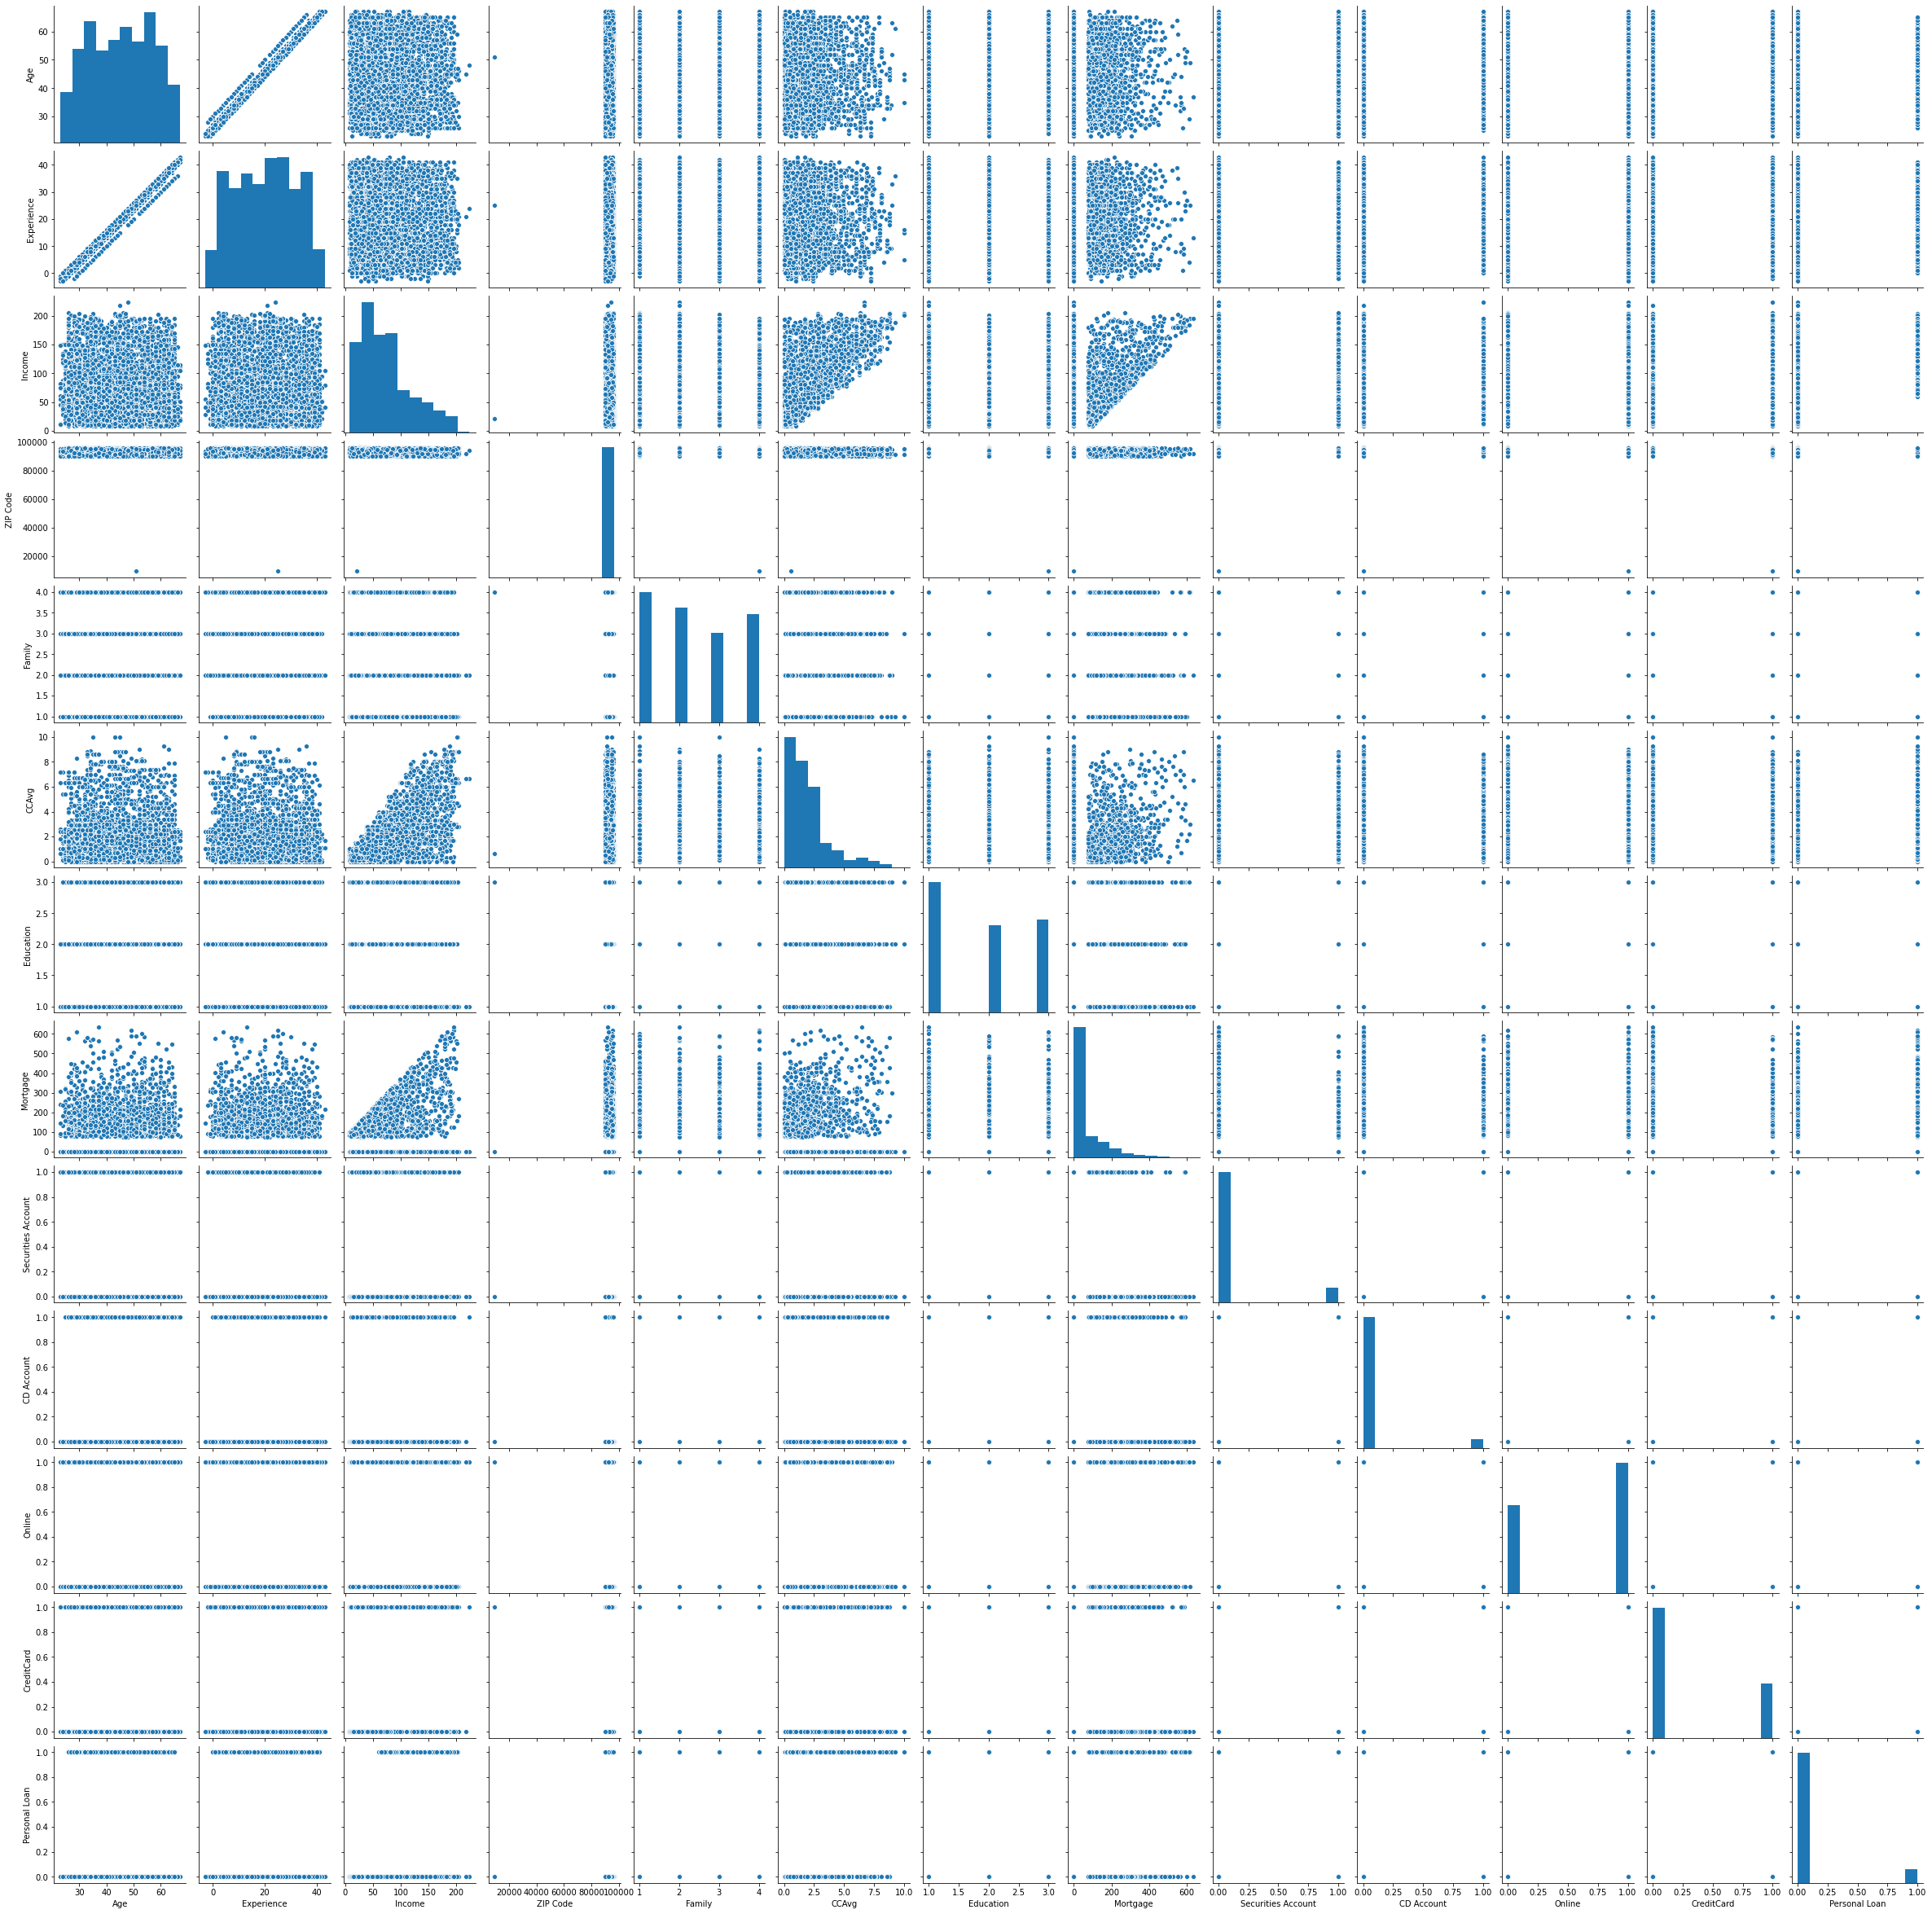

In [16]:
sns.pairplot(df.iloc[:,1:])

**Observation :** 

    From the above pair plot we can infer the association among the attributes and target column as follows:

* 'Age' column is normally distributed. Both the mean and median is almost same which we have also seen in the transpose matrix. Most of the customers age is between 25 to 65 years.
* 'Experience' is also normally distributed. Here also mean is amost equal to median. 'Experience' and 'Age' are stong possitive associasion.
* 'Income' is positively skewed and it also has outlier
* We dont see any relationship with the ZIP Code and other variables.
* Family and Education has low association with the 'Personal Loan'.
* The disribution of CCAvg is also a possotively skewed variable. Majority of the customers average monthly spending is between 1k to 9k.
* 'Mortgage' is also positively skewed. Majority of the individuals have a mortgage of less than 40K.


###### Data Cleaning

In [17]:
# Checking the negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [18]:
# Total no. of negative values
df[df['Experience'] < 0]['Experience'].count()

52

###### Checking the association of Experience with other quantitive variables :

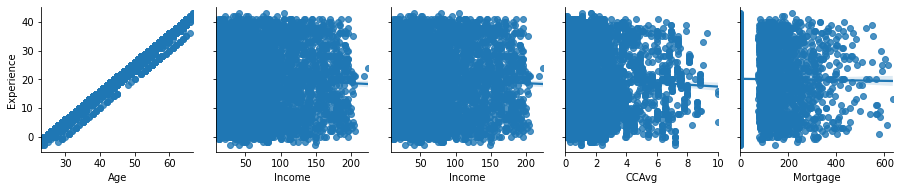

In [19]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

**Observation:**
    By looking above plots we can see that 'Age' has very strong and possitive association with 'Experience'. I am also considering 'Education' to fix the negative experience error. Becuase as we know experience relates to the education level.

**Decission:**
    We can replace each negative 'Experience' value with the median of possitive 'Experience' associated with the particular 'Age' and 'Education' value.



**Steps to be followed in the following code:**

* Get the record of experience whose value is greater than 0
* Get the record of experience whose value is lesser than 0
* Get the list of Cutomer ID whose experience value is negative
* Get the list of 'Age' values where it finds negative values in 'Experience' column
* Get the list of 'Education' values where it finds negaitve values in 'Experience' column
* Next it filters the records matching the above conditions from the dataframe which has data with possive experience and takes the median and store in exp. There could be chance that there will be no possive experience which matches the above condtion.
* In such case it matches the above condiiton from the dataframe which has the record with negative experience and gets the median and store in exp.
* Next it will replace the negative experience with the median.
* After execution of below code we will check the negative experience again

In [20]:
df_Possitive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

In [21]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

0

**Output:**

Now we can see that negative values count is 0 means there is no negative value anymore in the dataframe.

Describing the 'Experience' column to check the count, mean, standard deviation and five point summary.

In [22]:
df.Experience.describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

From the reusult Now we can see the min is 0.0 which was -3.0 before error fixing.

## Study of Data Distribution in each Attribute

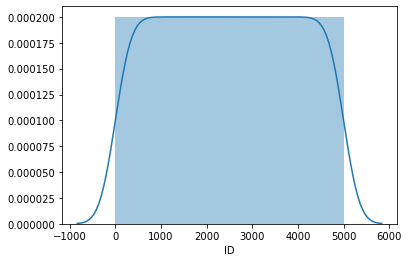

In [23]:
sns.distplot(df['ID'])

**Observation :**

* From the graph it is clear that ID has Uniform Distribution

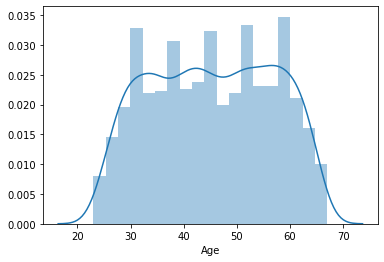

In [24]:
sns.distplot(df['Age'])

**Observation :**

* From the graph it show most of the customers are in the age group between 25 to 65 and also it is normally Distributed

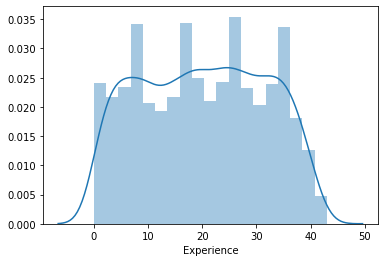

In [25]:
sns.distplot(df['Experience'])

**Observation :**

* Experience is Normally Distributed

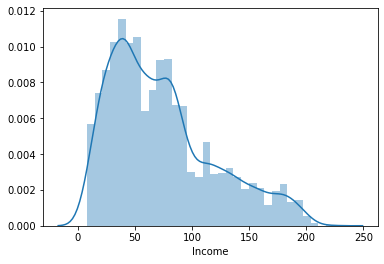

In [26]:
sns.distplot(df['Income'])

**Observation :**

* Income Distribution is right skewed 

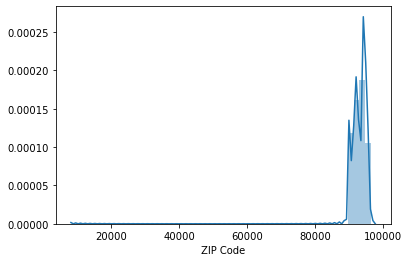

In [27]:
sns.distplot(df['ZIP Code'])

**Observation :**

* ZIP Code is Uniformly Distributed. But it is distributed more with family having 1 and 2 Members

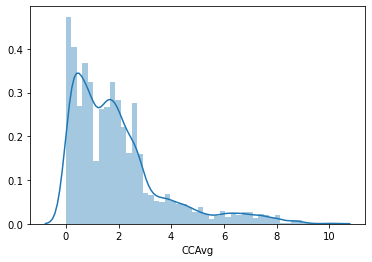

In [28]:
sns.distplot(df['CCAvg'])

**Observation :**

* CCAvg Distribution is right skewed
* Most of the Customers monthy avg spending amount on credit cards is between 1 to 2.5K
* Very few customers spend more than 8K on their credit card

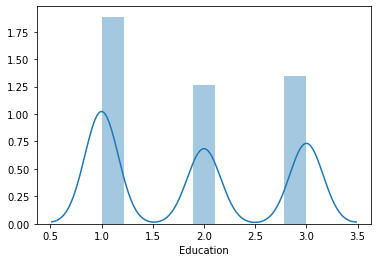

In [29]:
sns.distplot(df['Education'])

**Observation :**

* From the graph we could see under graduate customers are more than Graduate and Advanced or Professional customers

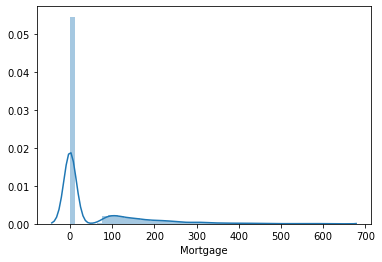

In [30]:
sns.distplot(df['Mortgage'])

**Observation:**

* Mortgage distribution is right skewed distribution.
* Most of the customers do not have mortgage. 
* There are more customers whose mortgage amount is between  80000to 150000 . 
* Very few customers whos mortgage amount is more than $600000.



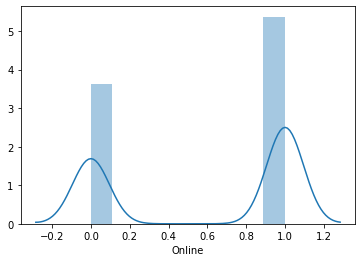

In [31]:
sns.distplot(df['Online'])

**Observation :**

* Number of Customers have online account is more than number of Customers who do not have online account
* This is  Bernoulli Distribution

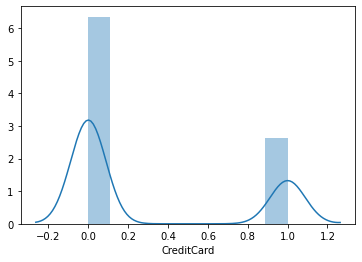

In [32]:
sns.distplot(df['CreditCard'])

**Observation :**

* Number of Customers without Credit Card is double than the number of customers have credit card
* This is  Bernoulli Distribution

#### Target Column Distribution [Distribution based on Personal Loan]

In [33]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


**Observation :**

* From the Data of 5000 Cx, Number of Cx with Loan is greater than the Cx who did not take loan

#### Pie Chart Distribution Represention of Personal Loan

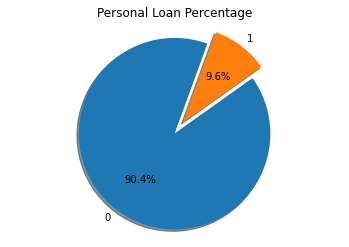

In [34]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

**Observation :**

* From the representation we could see 1:10 ration Cx falls into Not accepting Loan Category
* Hence we will be able to predict/build a model which performs better to identify Cx who will not accept Loan, eventhough our problem statement is to identify the Cx who will accept Loan

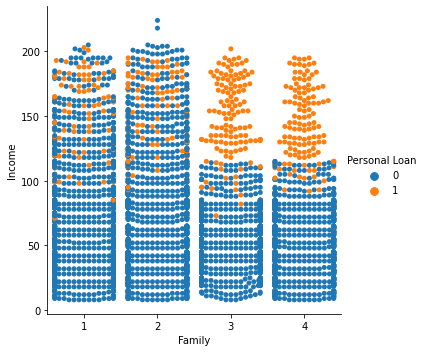

In [35]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

**Observation:**

* Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan

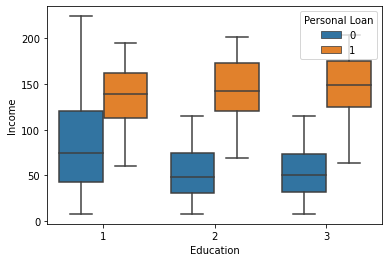

In [36]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

**observation:**

* From above we can say that customers with undergraduate level of education and family greater than 3 are good customers who took loan.
* Customer who took loan have same income range irrespective of education level.
* Education of Graduate and above have more chance to take loan.

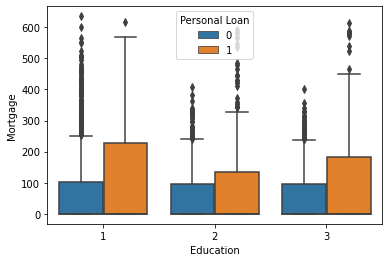

In [37]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

**Observation :**

* From the above box plot we can see that customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level.
* Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.



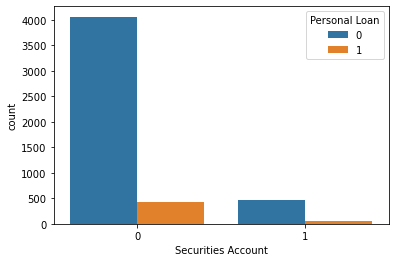

In [38]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

**Observation :**

* Customers who has securies account are more likly to take loan.
* Majority of customers who does not have loan do not have securities account

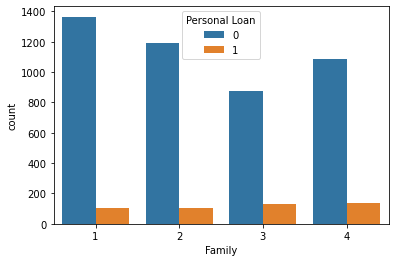

In [39]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

**Observation :**

* Family size does not have any impact in personal loan. 
* But families with size of 3 and 4 are more likely to take loan.

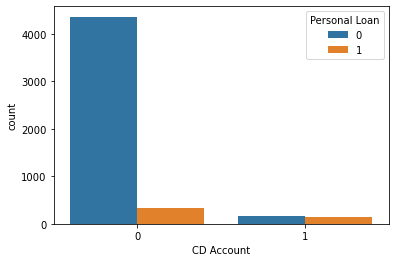

In [40]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

**Observation :**

* Customers who does not have CD account, does not have loan. 
* This seems to be majority. 
* On the contrary all customers who has CD account has loan as well

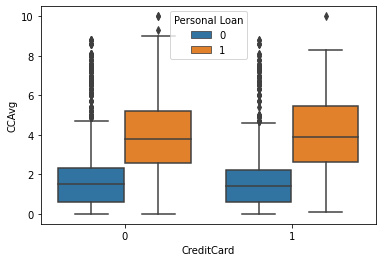

In [41]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

**Observation :**

* Customers who have credit card and monthly spending is higher are more likly to take loan

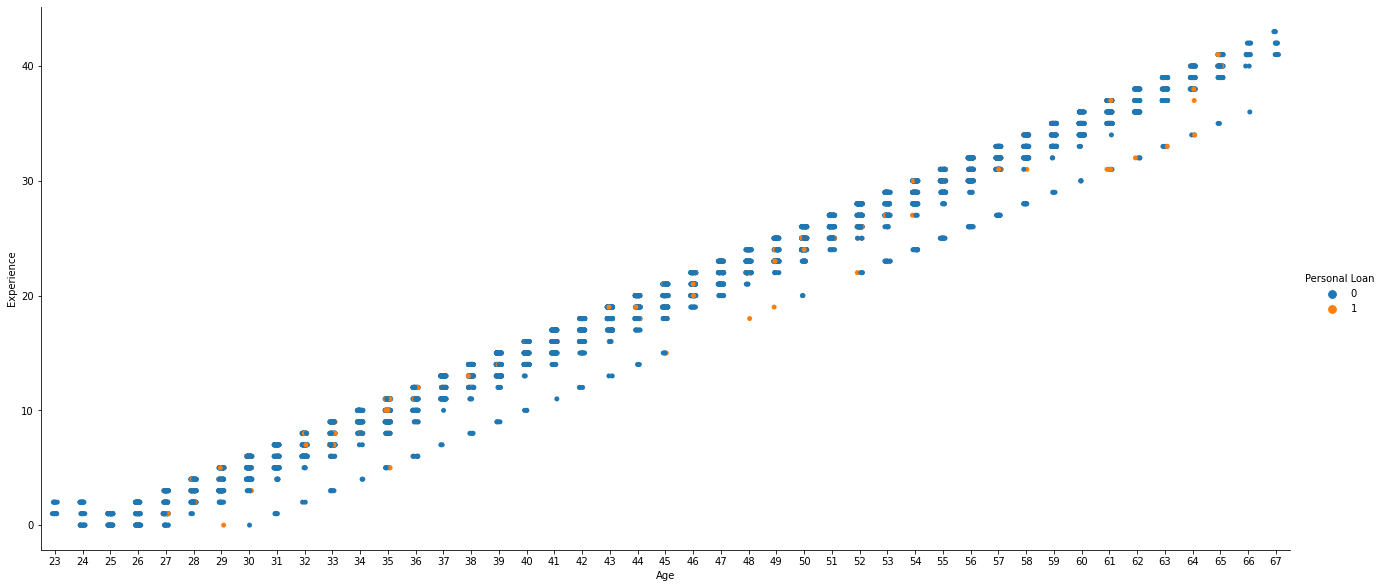

In [42]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

**Observation :**

* From the above we clearly see that Age and Experience have very storng association.
* As Age increases Experience also increases.
* Because of this We will try building our model by droping Experience column.

Text(0.5, 1.0, 'CCAvg Distribution')

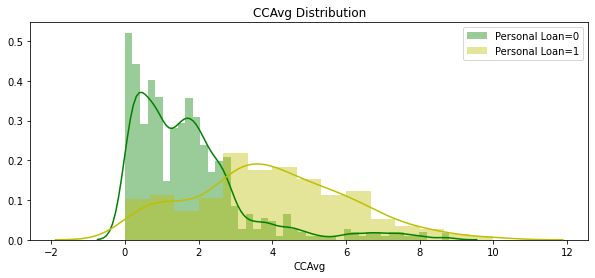

In [43]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'g',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'y',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

**Observation :**

* Customers who have taken personal loan have higher credit card average than those who did not take loan.
* So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.



In [44]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation :** 

* The graph show persons who have personal loan have a higher credit card average.
* Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.
* Lower credit card spending with a median of 1400 dollars is less likely to take a loan

Text(0.5, 1.0, 'Income Distribution')

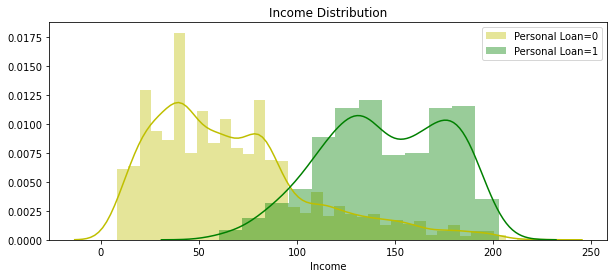

In [45]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'y',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'g',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

**Observation :**

* Customers who have taken personal loan have income than those who did not take.
* So high income seems to be good predictor of whether or not a customer will take a personal loan

##### Outliers Identification

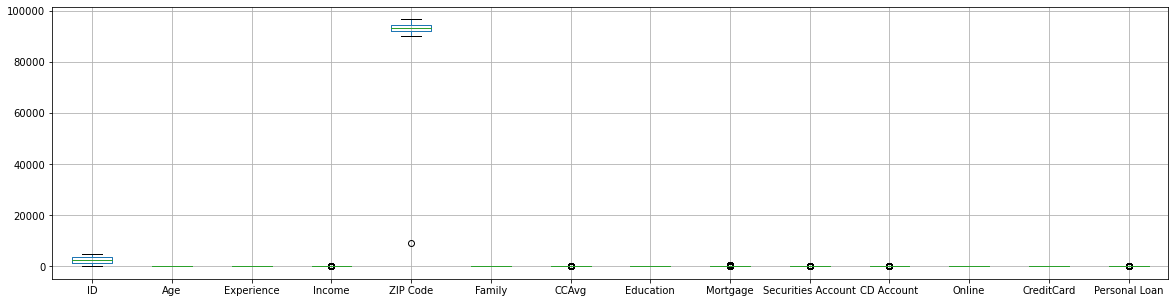

In [46]:
df.boxplot(return_type='axes', figsize=(20,5))

**Observation :**

* The boxplot shows there are outliers on few colomns.
* Mortgage has more number of outlier. 
* Income, CCAvg have also outliers. 
* we will perform scaling of  attributes to fix the Outliers.

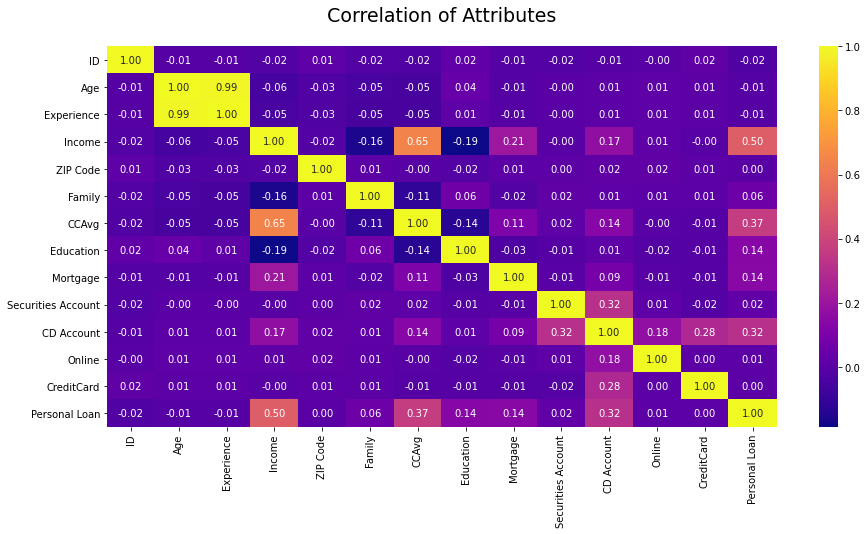

In [47]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

**Observation :** 

We are using Heat map to see the correlation of Attributes :

* **Age and Experience** are highly correlated and the correlation is almost 1.
* **Income** and **CCAvg** is moderately correlated.
* **Personal Loan** has maximum correlation with **Income, CCAvg, CD Account, Mortgage, and Education**.
* We can see in above heat map there is association of **CD Account** with **Credit Card, Securities Account, Online, CCAvg and Income**.
* 'Mortgage' has moderate correlation with 'Income' which is about 12%.
* **Income** influences **CCAvg, Personal Loan, CD Account and Mortgage**.


## Model Building

**Data Cleaning**

* As we have seen above **ID** and **ZIP Code** are not relevent for our model building so we will drop it.
* **Age** and **Experience** are highly correlated so we will build our model **with Experience** and **without Experience** after that we will compare the accurace which will lead us to the conclution that **with Experience** or **without Experience** which model is better for prediction.


In [48]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [49]:
df = df.drop(['ID','ZIP Code'], axis=1)

In [50]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


* Now as mentioned earlier we will be Creating two dataframes **with Experience** and **without Experience** respectively


In [51]:
loan_with_experience = df
loan_without_experience = df.drop(['Experience'], axis=1)

In [52]:
print('Columns With Experience : ', loan_with_experience.columns)

Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')


In [53]:
print('Columns Without Experience : ', loan_without_experience.columns)

Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')


* Now we will Seperate Target Variable [**Personal Loan**] from Independent Variables from **With Experience** Dataframe and **Wihtout Experience** Dataframe


In [54]:
# From Exprenece Dataframe:
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]

In [55]:
# From Exprenece Dataframe:
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]

#### Spliting the data into training and test set in the ratio of 70:30

In [56]:
# From Experience Dataframe:
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [57]:
# From Without Experience Dataframe:
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 10)
y train data (3500, 1)
x test data  (1500, 10)
y test data  (1500, 1)


##### Logistic Regression

**With Experience Column**

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
#X_Exp_train, X_Exp_test, y_Exp_train, y_Exp_test
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Predicting for test set
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

LogisticRegression() 



**Without Experience Column**

In [60]:
#X_train, X_test, y_train, y_test
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

**Comparison :** 

* Below is the comparison between **Logistic Regression Model** Accuracy and Confussion Matrix **with Experience** and **Without Experience**.

In [61]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Possitive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Possive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Possitive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Possive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])

Logistic Regression Model Accuracy Score W/O Experience  : 0.939333
Logistic Regression Model Accuracy Score With Experience : 0.944000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1338   13]
 [  78   71]]

True Possitive    =  71
True Negative     =  1338
False Possive     =  13
False Negative    =  78

Logistic Regression Confusion Matrix With Experience: 
 [[1334   17]
 [  67   82]]

True Possitive    =  82
True Negative     =  1334
False Possive     =  17
False Negative    =  67


**Observation :**

* From the above accuracy results we see that accuracy is higher **with Experience** (94.40 %) than **without Experience** (93.93%).
* Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better with 'Experience'.
* Type 1 (False Possitive) and Type 2(False Negative) errors is less with experience.
* Hence we can imporove the accuracy by scalling the attributes.
* We will not consider dafaframe **Without Experience** for further iteration.


**Logistic Regression Iteration 2 With Experience Column**

In [62]:
#X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)

In [63]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)

In [64]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_Expr_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of Logistic Regression----------------------------

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.947333

After Scalling Logistic Regression Confusion Matrix With Experience: 
 [[1333   18]
 [  61   88]]

True Possitive    =  88
True Negative     =  1333
False Possive     =  18
False Negative    =  61

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.83
recall of accepting Loan    :  0.59
F1 score of accepting Loan  :  0.69


**Observation :**

* After Scaling the updated Accuracy is 94.37%
* Accuracy of Customer who will accept Loan is 95%

##### KNN [K Nearest Neighbour]

* Similar to **Logistic Regression**, In **KNN** as well we will follow the same procedure
* We will try Model **With Experience** and **Without Experience**
* We will run the KNN with number of odd neighbours ranges from 1 to 20 and will find the optimal number of neighbours using the Miss classification error.
* After finding best K, will build the model using **With Experience** and **without Experience**.


Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9086666666666666, 0.9093333333333333, 0.906, 0.9026666666666666, 0.9053333333333333, 0.908, 0.908, 0.9066666666666666, 0.9073333333333333, 0.904]

Misclassification error :
 [0.09133333333333338, 0.09066666666666667, 0.09399999999999997, 0.09733333333333338, 0.09466666666666668, 0.09199999999999997, 0.09199999999999997, 0.09333333333333338, 0.09266666666666667, 0.09599999999999997]

The optimal number of neighbor is k= 3


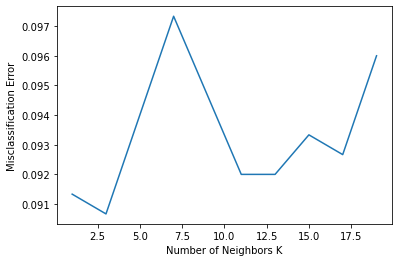

In [65]:
#Creating number list from range 1 to 20 of K for KNN

numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declaring a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())               
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**Observation :**

* Misclassification error is minimum at k = 3
* Considering the 3 as Optimal K Value, the model accuracy is 0.909
* In addition to this it is clearly visible that Error is low when the Optimal K value is 3

**KNN Model building using _Without Experience_ dataframe**

* We have already created the dataframe and splited the data logistic regression, will be using the same.
* Splited data from **Without Experience** dataframe: X_train, X_test, y_train, y_test


In [66]:
# instantiating learning model (optimal_k = 3)
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_y_predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predicted)

**KNN Model building using _With Experience_ dataframe**

* We have already created the dataframe and splited the data logistic regression, will be using the same.
* Splited data from **With Experience** dataframe: X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test

In [67]:
# instantiating learning model (optimal_k = 3)
knn_model_expr = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_expr.fit(X_Expr_train, y_Expr_train)
knn_expr_y_predicted = knn_model_expr.predict(X_Expr_test)
knn_expr_score = knn_model_expr.score(X_Expr_test, y_Expr_test)
knn_expr_accuracy = accuracy_score(y_Expr_test, knn_expr_y_predicted)
knn_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, knn_expr_y_predicted)

**Comparison :** 

* Below is the comparison between **KNN Model** Accuracy and Confussion Matrix **with Experience** and **Without Experience**.

In [68]:
# Comparison 
print('K-NN Model Accuracy Score Without Experience  : %f'  % knn_accuracy)
print('K-NN Model Accuracy Score With Experience : %f'  % knn_expr_accuracy)

# Confusion Matrix
print('\nK-NN Confusion Matrix Without Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_expr)
print('\nTrue Possitive    = ', knn_confusion_matrix_expr[1][1])
print('True Negative     = ',   knn_confusion_matrix_expr[0][0])
print('False Possive     = ',   knn_confusion_matrix_expr[0][1])
print('False Negative    = ',   knn_confusion_matrix_expr[1][0])

K-NN Model Accuracy Score Without Experience  : 0.909333
K-NN Model Accuracy Score With Experience : 0.904000

K-NN Confusion Matrix Without Experience: 
 [[1304   47]
 [  89   60]]

True Possitive    =  60
True Negative     =  1304
False Possive     =  47
False Negative    =  89

K-NN Confusion Matrix With Experience: 
 [[1301   50]
 [  94   55]]

True Possitive    =  55
True Negative     =  1301
False Possive     =  50
False Negative    =  94


**Observation :**

* From the above accuracy results we see that accuracy is higher at **without Experience** (90.93%) than **with Experience** (90.40%).
* Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better at without 'Experience'.
* Type 1 (False Possitive) and Type 2(False Negative) errors is less at without Experience.
* Hence we can improve the accuracy by scalling the attributes.
* We will not consider dafaframe **With Experience** for further iteration.


**KNN Model Iteration 2 Without Experience Column**

In [69]:
#X_train, X_test, y_train, y_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [70]:
scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

In [71]:
print('----------------------Final Analysis of K-NN----------------------------\n')
print('After Scalling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scalling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of K-NN----------------------------

After Scalling K-NN Model Accuracy Score without Experience: 0.958667

After Scalling K-NN Confusion Matrix Without Experience: 
 [[1341   10]
 [  52   97]]

True Possitive    =  97
True Negative     =  1341
False Possive     =  10
False Negative    =  52

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Accuracy of accepting Loan  :  0.96
precision of accepting Loan :  0.91
recall of accepting Loan    :  0.65
F1 score of accepting Loan  :  0.76


**Observation :**

* After Scaling the updated Accuracy is 95.86%
* Accuracy of Customer who will accept Loan is 96%

##### Naive Bayes

* Similar to **Logistic Regression** and  **KNN** , In **Naive Bayes** as well we will follow the same procedure
* We will try Model **With Experience** and **Without Experience**

**Model building using _Without Experience_ dataframe**

* Splited data from **Without Experience** dataframe: X_train, X_test, y_train, y_test

In [72]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_predicted = gnb_model.predict(X_test)
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)

**Model building using _With Experience_ dataframe**

* Splited data from **With Experience** dataframe: X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test


In [73]:
gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_Expr_train, y_Expr_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_Expr_test)
gnb_expr_score = gnb_expr_model.score(X_Expr_test, y_Expr_test)
gnb_expr_accuracy = accuracy_score(y_Expr_test, gnb_expr_y_predicted)
gnb_expr_confusion_matrix = metrics.confusion_matrix(y_Expr_test, gnb_expr_y_predicted)

In [74]:
# Comparison 
print('Naïve Bayes Model Accuracy Score Without Experience  : %f'  % gnb_accuracy)
print('Naïve Bayes Model Accuracy Score With Experience : %f'  % gnb_expr_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix Without Experience: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\nNaïve Bayes Confusion Matrix With Experience: \n', gnb_expr_confusion_matrix)
print('\nTrue Possitive    = ', gnb_expr_confusion_matrix[1][1])
print('True Negative     = ',   gnb_expr_confusion_matrix[0][0])
print('False Possive     = ',   gnb_expr_confusion_matrix[0][1])
print('False Negative    = ',   gnb_expr_confusion_matrix[1][0])

Naïve Bayes Model Accuracy Score Without Experience  : 0.874667
Naïve Bayes Model Accuracy Score With Experience : 0.874667

Naïve Bayes Confusion Matrix Without Experience: 
 [[1227  124]
 [  64   85]]

True Possitive    =  85
True Negative     =  1227
False Possive     =  124
False Negative    =  64

Naïve Bayes Confusion Matrix With Experience: 
 [[1228  123]
 [  65   84]]

True Possitive    =  84
True Negative     =  1228
False Possive     =  123
False Negative    =  65


**Observation :**

* From above we see that accuracy is almost same for **without Experience** and **with Experience**.
* Also from the above confusion matrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is almost same at **without Experience**.
* Type I (False Possitive) and Type II(False Negative) errors is same.
* Hence we can imporove the accuracy by scalling the attributes.
* We can consider any dafaframe **With Experience** or **Without Experience** for further iteration.


**Naive Bayes Model Iteration 2 Without Experience Column**

In [75]:
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

In [76]:
print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scalling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

----------------------Final Analysis of Naïve Bayes----------------------------

After Scalling Naïve Bayes Model Accuracy Score: 0.872000

After Scalling Naïve Bayes Confusion Matrix: 
 [[1224  127]
 [  65   84]]

True Possitive    =  84
True Negative     =  1224
False Possive     =  127
False Negative    =  65

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500


Accuracy of accepting Loan   :  0.86
precision of accepting Loan  :  0.4
recall of accepting Loan     :  0.56
F1 score of accepting Loan   :  0.47


**Observation :**

* Model Accuracy is at 87.2%
* Accuracy of Customer Accepting Loan is 86%

### Comparison of all the three Models

Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1333   18]
 [  61   88]]

     True Positive    =  88
     True Negative     =  1333
     False Positive     =  18
     False Negative    =  61

K-Nearest Neighbors: 
 [[1341   10]
 [  52   97]]

    True Positive    =  97
    True Negative     =  1341
    False Positive     =  10
    False Negative    =  52

Naive Bayes: 
 [[1224  127]
 [  65   84]]

    True Positive    =  84
    True Negative     =  1224
    False Positive     =  127
    False Negative    =  65


Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


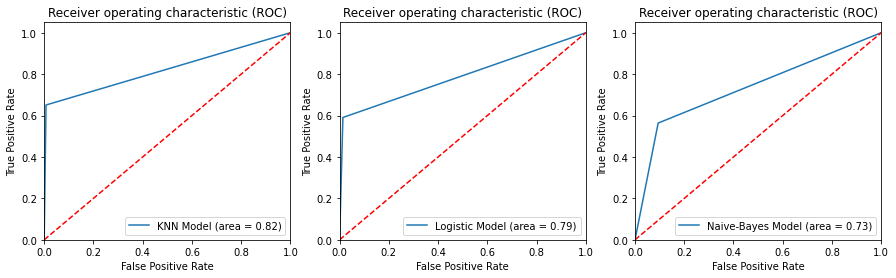

In [77]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Positive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Positive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Positive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Positive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Positive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Positive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Based on the Model comparison results**

* K-Nearest Neighbour Algorithm with scaled attributes best Accuracy % of 96%
* **Type I (False Positive)** and **TypeII (False Negative)** values are 10 and 52 respectively which is comparitively Low compared to other models
* From ROC curve it is clearly evident that **K-NN** has an area of **0.82** which is close to 1 compare to others which is lower that K-NN ROC area
* From the Observation it shows **K-NN** will be the best fit model to identify customer who will accept Loan